In [18]:
import time
t1=time.time()

import logging
import os
import scanpy as sc
import scvi
from scvi import autotune
from hyperopt import hp

import datetime
import sys
import argparse
import anndata
import numpy as np
import ray
from ray import tune

import scarches as sca
import seaborn as sb
import matplotlib.pyplot as plt

In [28]:
plt.rcParams.update({'font.size': 12, 'axes.titlesize': 12, 'axes.labelsize': 12, 'xtick.labelsize': 8, 'ytick.labelsize': 8})

In [2]:
adata=sc.read("../../process/pre-intergration/big_data/20241008_core_pp_log1p_half_gene_small_HVG.h5ad")

In [3]:
condition_key = "Sample"
labels_key = "coarse_anno_1"

In [ ]:
model_cls = sca.models.SCVI
tuner = scvi.autotune.ModelTuner(model_cls)
tuner.info()
dispersions=["gene", "gene-batch"]
space = {
                "n_latent":  tune.qrandint(4,32,2),   # [5, 20]
                "n_hidden": tune.choice([64, 128, 256]),
                "n_layers":tune.qrandint(1,7,1),
                "dropout_rate":tune.choice([0.1, 0.3, 0.5, 0.7]),
                "gene_likelihood": tune.choice(["zinb", "nb"]),
                "dispersion": tune.choice(dispersions)
        }
adata.X = adata.layers['counts']
adata.raw = adata
raw = adata.raw.to_adata()
raw.X = adata.layers['counts']
adata.raw = raw
unlabeled = adata.obs.index[[ coarse_label != "Osteoblasts" for coarse_label in adata.obs.coarse_label]]
adata.obs['scanvi_label'] = adata.obs.coarse_label.tolist()
adata.obs.loc[unlabeled,'scanvi_label'] = "unlabeled"
condition_key = 'batch'
cell_type_key = 'scanvi_label'
unlabeled_category = "unlabeled"
sca.models.SCVI.setup_anndata(adata, batch_key=condition_key, labels_key=cell_type_key)
nlatent=10

In [ ]:
scvi.autotune.

In [4]:
model_cls = sca.models.SCVI
tuner = scvi.autotune.ModelTuner(model_cls)
tuner.info()
model_cls.setup_anndata(adata)
dispersions=["gene", "gene-batch"]
space = {
                "n_latent":  tune.qrandint(4,32,2),   # [5, 20]
                "n_hidden": tune.choice([64, 128, 256]),
                "n_layers":tune.qrandint(1,7,1),
                "dropout_rate":tune.choice([0.1, 0.3, 0.5, 0.7]),
                "gene_likelihood": tune.choice(["zinb", "nb"]),
                "dispersion": tune.choice(dispersions)
        }


adata.X = adata.layers['counts']
adata.raw = adata
raw = adata.raw.to_adata()
raw.X = adata.layers['counts']
adata.raw = raw
sca.models.SCVI.setup_anndata(adata, batch_key=condition_key, labels_key=labels_key)
nlatent=10

ModelTuner registry for SCVI

                  Tunable hyperparameters                  
┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┓
┃      Hyperparameter      ┃ Default value ┃    Source    ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━┩
│         n_hidden         │      128      │     VAE      │
│         n_latent         │      10       │     VAE      │
│         n_layers         │       1       │     VAE      │
│       dropout_rate       │      0.1      │     VAE      │
│        dispersion        │     gene      │     VAE      │
│     gene_likelihood      │     zinb      │     VAE      │
│   latent_distribution    │    normal     │     VAE      │
│    encode_covariates     │     False     │     VAE      │
│ deeply_inject_covariates │     True      │     VAE      │
│      use_batch_norm      │     both      │     VAE      │
│      use_layer_norm      │     none      │     VAE      │
│        optimizer         │     Adam      │ TrainingPlan │
│            lr            │     0.001     │ TrainingPlan │
│       weight_decay       │     1e-06     │ TrainingPlan │
│           eps            │     0.01      │ TrainingPlan │
│    n_steps_kl_warmup     │     None      │ TrainingPlan │
│    n_epochs_kl_warmup    │      400      │ TrainingPlan │
│   reduce_lr_on_plateau   │     False     │ TrainingPlan │
│        lr_factor         │      0.6      │ TrainingPlan │
│       lr_patience        │      30       │ TrainingPlan │
│       lr_threshold       │      0.0      │ TrainingPlan │
│          lr_min          │       0       │ TrainingPlan │
│      max_kl_weight       │      1.0      │ TrainingPlan │
│      min_kl_weight       │      0.0      │ TrainingPlan │
└──────────────────────────┴───────────────┴──────────────┘

       Available metrics        
┏━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃     Metric      ┃    Mode    ┃
┡━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ validation_loss │    min     │
└─────────────────┴────────────┘

                         Default search space                         
┏━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Hyperparameter ┃ Sample function ┃  Arguments  ┃ Keyword arguments ┃
┡━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│    n_hidden    │     choice      │ [[64, 128]] │        {}         │
└────────────────┴─────────────────┴─────────────┴───────────────────┘

/home/gilberthan/anaconda3/envs/py311/lib/python3.11/abc.py:119: FutureWarning: SparseDataset is deprecated and will be removed in late 2024. It has been replaced by the public classes CSRDataset and CSCDataset.

For instance checks, use `isinstance(X, (anndata.experimental.CSRDataset, anndata.experimental.CSCDataset))` instead.

For creation, use `anndata.experimental.sparse_dataset(X)` instead.

  return _abc_instancecheck(cls, instance)
/home/gilberthan/anaconda3/envs/py311/lib/python3.11/site-packages/scvi/data/fields/_layer_field.py:91: UserWarning: adata.X does not contain unnormalized count data. Are you sure this is what you want?
  warnings.warn(
/home/gilberthan/anaconda3/envs/py311/lib/python3.11/abc.py:119: FutureWarning: SparseDataset is deprecated and will be removed in late 2024. It has been replaced by the public classes CSRDataset and CSCDataset.

For instance checks, use `isinstance(X, (anndata.experimental.CSRDataset, anndata.experimental.CSCDataset))` instead.

For 

In [5]:
results = tuner.fit(adata, metric="validation_loss",search_space=space,num_samples=100)

/home/gilberthan/anaconda3/envs/py311/lib/python3.11/subprocess.py:1832: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _fork_exec(
2024-10-18 17:23:18,905	INFO worker.py:1724 -- Started a local Ray instance.
2024-10-18 17:23:19,926	INFO tune.py:220 -- Initializing Ray automatically. For cluster usage or custom Ray initialization, call `ray.init(...)` before `Tuner(...)`.
2024-10-18 17:23:19,929	INFO tune.py:583 -- [output] This uses the legacy output and progress reporter, as Jupyter notebooks are not supported by the new engine, yet. For more information, please see https://github.com/ray-project/ray/issues/36949
(pid=581659) Global seed set to 0
(_trainable pid=581659) <frozen abc>:119: FutureWarning: SparseDataset is deprecated and will be removed in late 2024. It has been replaced by the public classes CSRDataset and CSCDataset.
(_trainable pid=581659) 
(_traina

In [7]:
pltDf=results.results.get_dataframe()

In [8]:
pltDf

,validation_loss,timestamp,checkpoint_dir_name,done,training_iteration,trial_id,date,time_this_iter_s,time_total_s,pid,...,node_ip,time_since_restore,iterations_since_restore,config/n_latent,config/n_hidden,config/n_layers,config/dropout_rate,config/gene_likelihood,config/dispersion,logdir
0,1157.385498,1729243495,None,True,1,9b5cf_00000,2024-10-18_17-24-55,83.109610,83.109610,581537,...,192.168.1.100,83.109610,1,22,64,2,0.7,nb,gene-batch,9b5cf_00000
1,1017.316406,1729243743,None,True,4,9b5cf_00001,2024-10-18_17-29-03,81.365171,330.014071,581540,...,192.168.1.100,330.014071,4,12,64,2,0.3,nb,gene-batch,9b5cf_00001
2,1220.706055,1729243497,None,True,1,9b5cf_00002,2024-10-18_17-24-57,84.150100,84.150100,581560,...,192.168.1.100,84.150100,1,14,64,4,0.5,nb,gene,9b5cf_00002
3,962.423584,1729249790,None,True,100,9b5cf_00003,2024-10-18_19-09-50,50.675084,6376.645573,581579,...,192.168.1.100,6376.645573,100,6,64,1,0.1,nb,gene-batch,9b5cf_00003
4,1047.975952,1729243623,None,True,2,9b5cf_00004,2024-10-18_17-27-03,105.085532,210.981139,581600,...,192.168.1.100,210.981139,2,24,128,5,0.3,zinb,gene,9b5cf_00004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,936.406799,1729250773,None,True,100,9b5cf_00095,2024-10-18_19-26-13,43.710852,6559.341432,581859,...,192.168.1.100,6559.341432,100,32,256,1,0.7,nb,gene-batch,9b5cf_00095
96,923.276794,1729251072,None,True,100,9b5cf_00096,2024-10-18_19-31-12,41.354015,6833.547143,581828,...,192.168.1.100,6833.547143,100,14,256,3,0.3,nb,gene-batch,9b5cf_00096
97,1134.999146,1729244397,None,True,1,9b5cf_00097,2024-10-18_17-39-57,131.220823,131.220823,581659,...,192.168.1.100,131.220823,1,18,256,6,0.5,zinb,gene-batch,9b5cf_00097
98,921.020020,1729251326,None,True,100,9b5cf_00098,2024-10-18_19-35-26,38.174877,7045.110833,581851,...,192.168.1.100,7045.110833,100,28,128,1,0.1,zinb,gene-batch,9b5cf_00098


/tmp/ipykernel_578663/3896256050.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.boxplot(x="config/n_latent",y="validation_loss",data=pltDf,palette="Set3")


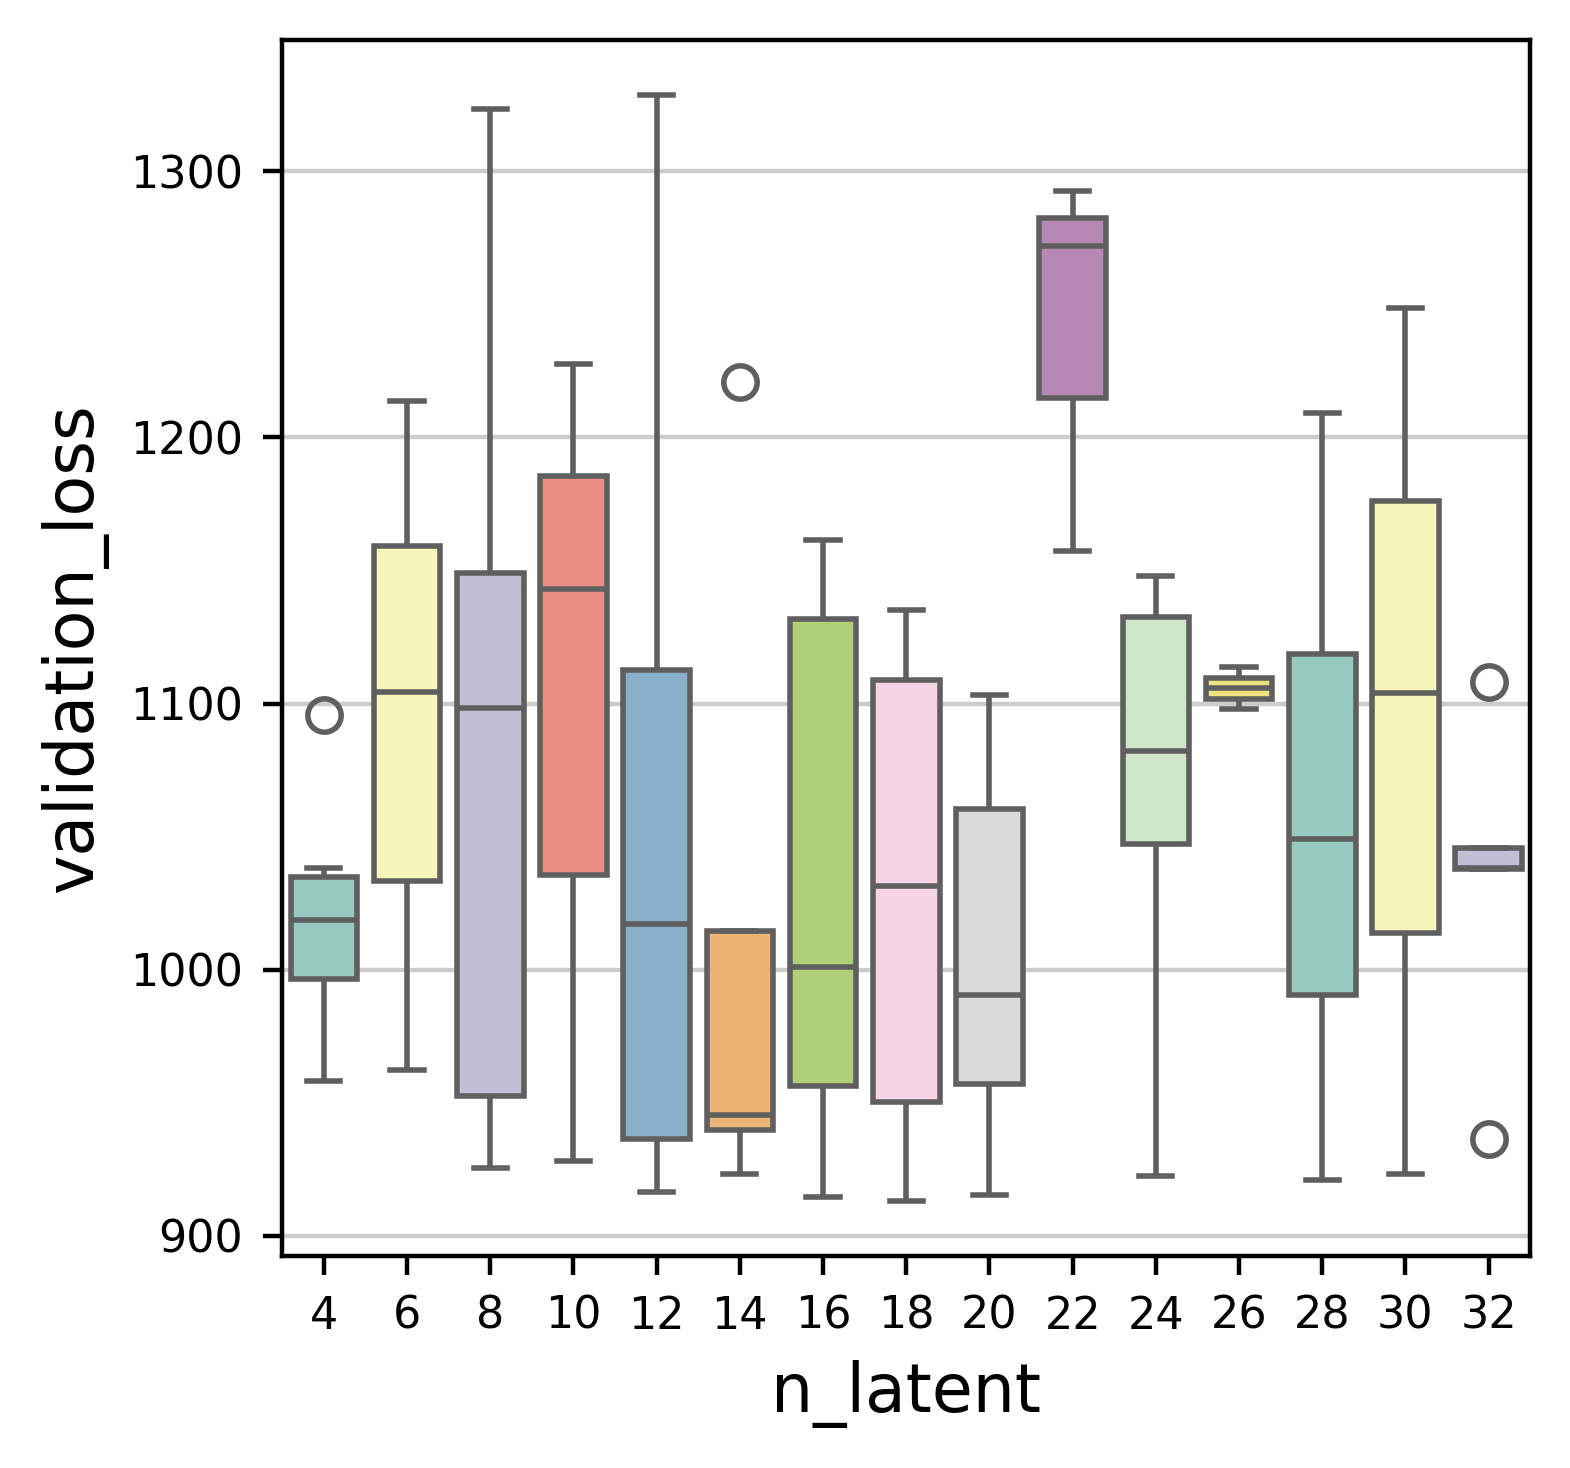

In [31]:
sb.boxplot(x="config/n_latent",y="validation_loss",data=pltDf,palette="Set3")
plt.xlabel("n_latent")
plt.savefig("../../results/preIntergration/20241018_hyperpara/tune_latent.pdf")

/tmp/ipykernel_578663/1636474424.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.boxplot(x="config/gene_likelihood",y="validation_loss",data=pltDf,palette="Set3")


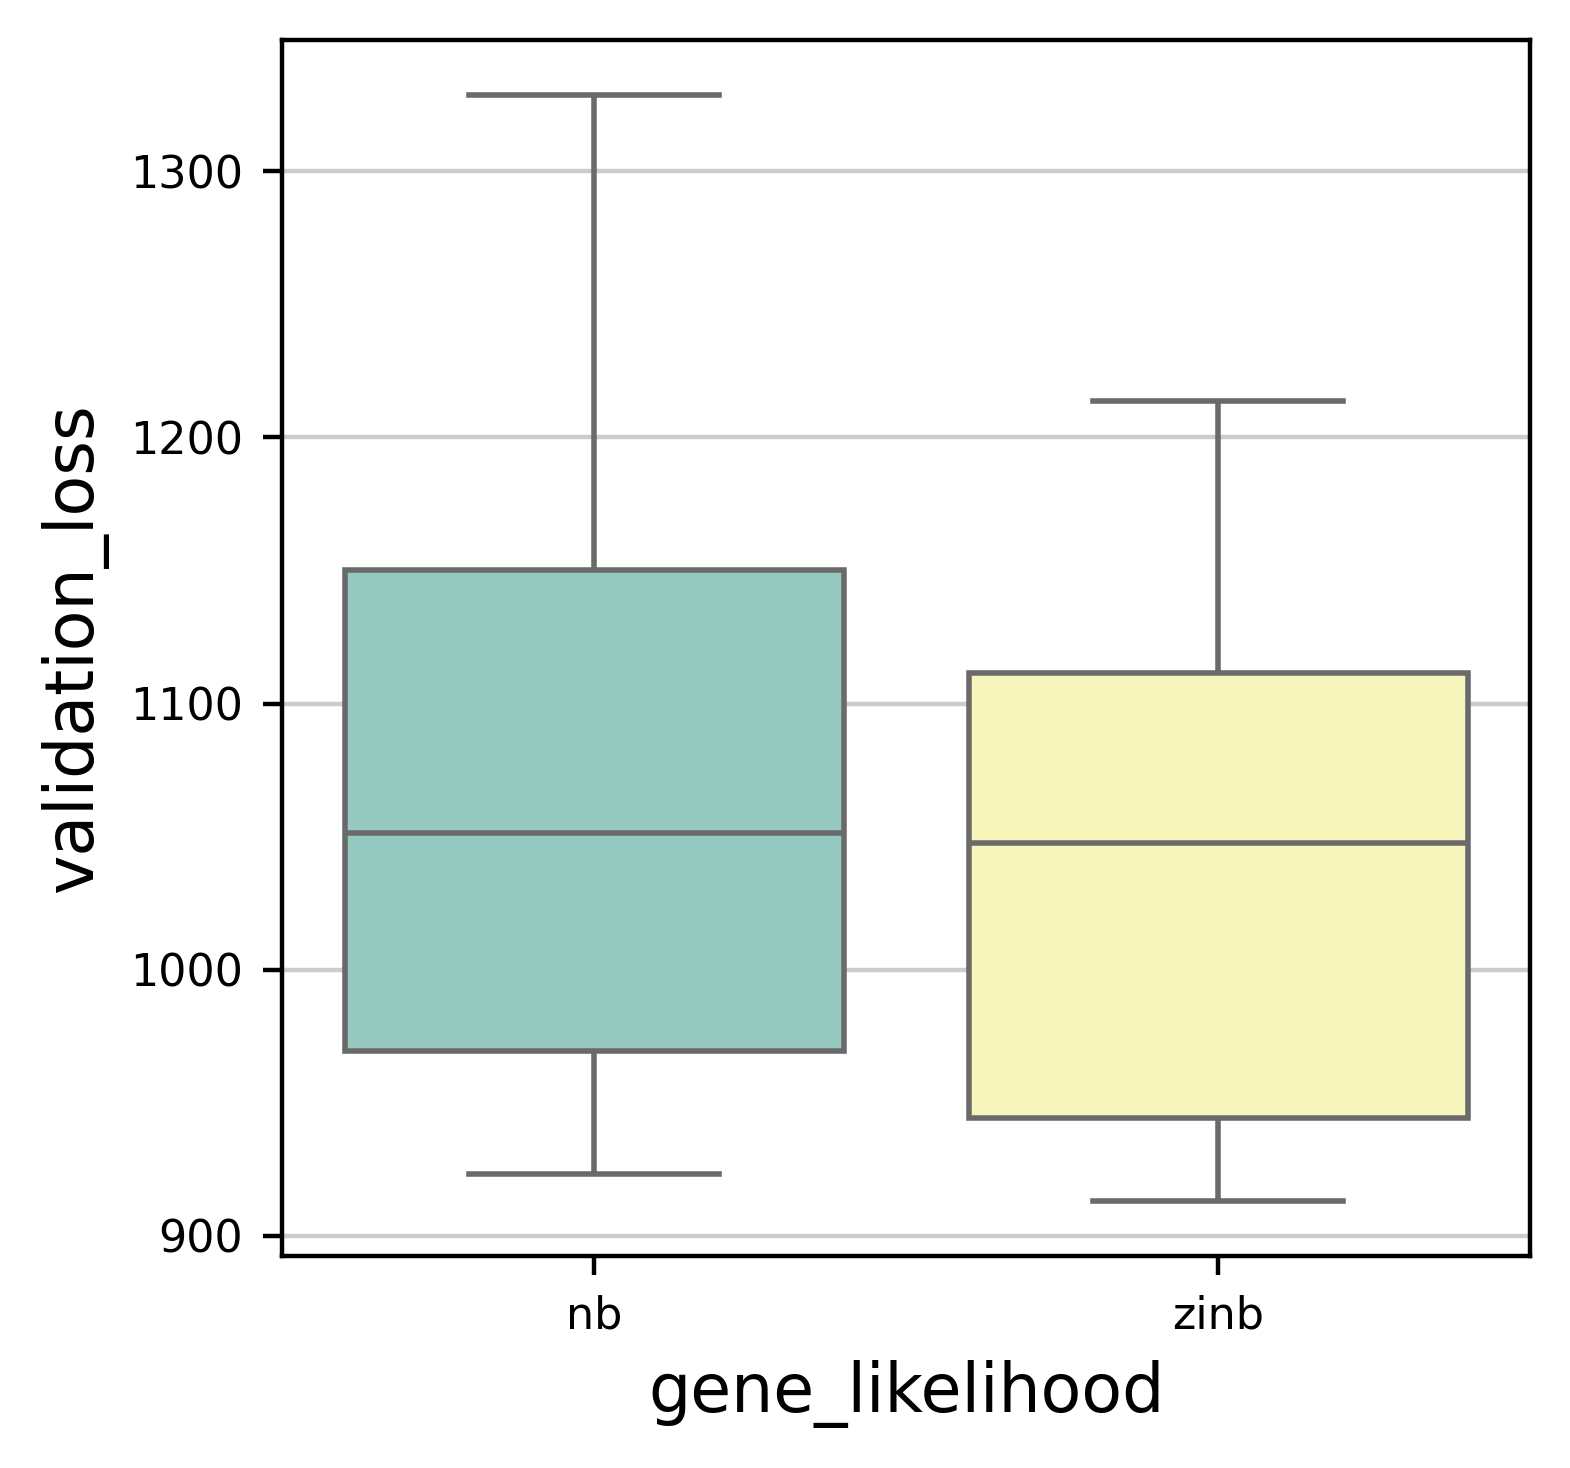

In [33]:
sb.boxplot(x="config/gene_likelihood",y="validation_loss",data=pltDf,palette="Set3")
plt.xlabel("gene_likelihood")
plt.savefig("../../results/preIntergration/20241018_hyperpara/tune_gene_likelihood.pdf")

/tmp/ipykernel_578663/280348728.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.boxplot(x="config/dropout_rate",y="validation_loss",data=pltDf,palette="Set3")


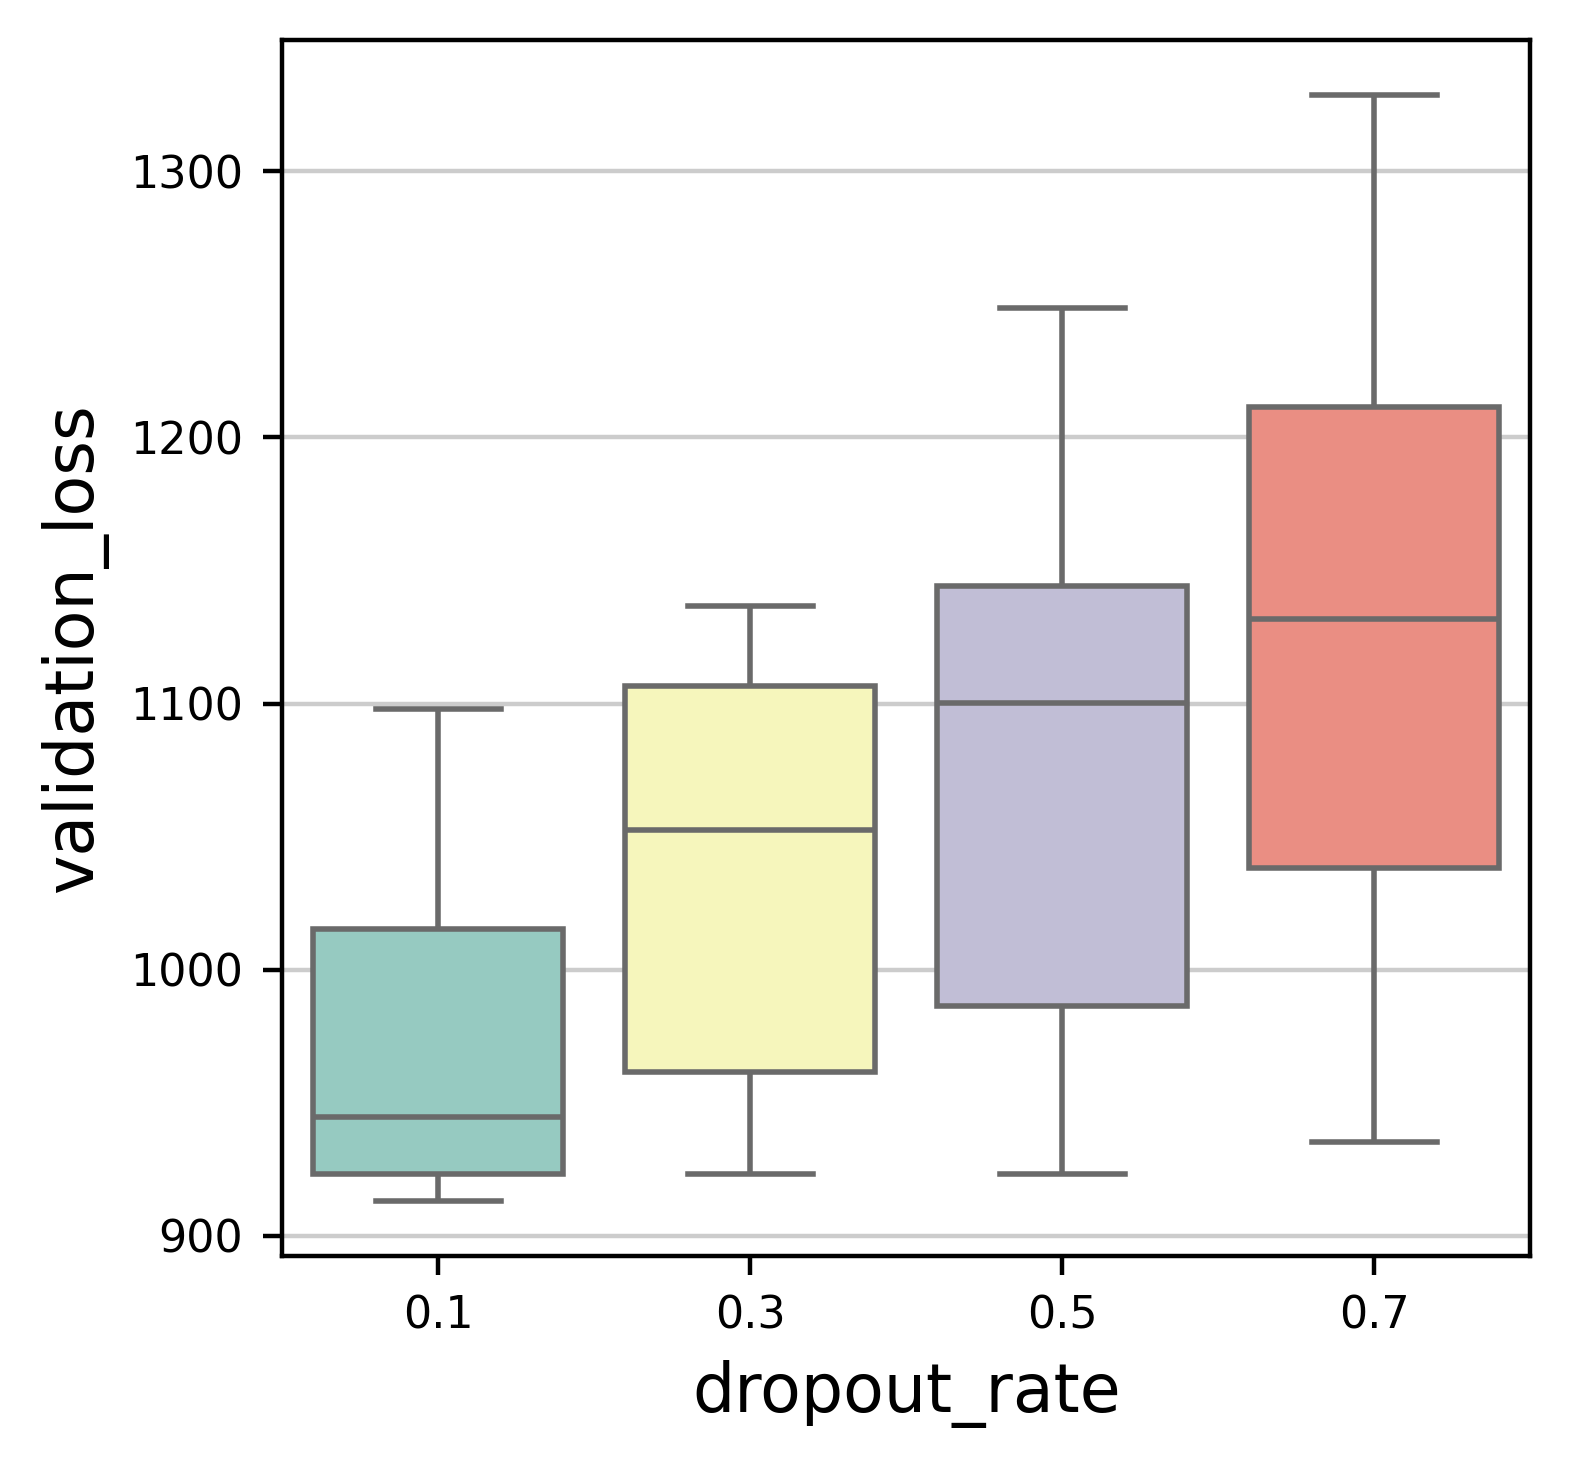

In [35]:
sb.boxplot(x="config/dropout_rate",y="validation_loss",data=pltDf,palette="Set3")
plt.xlabel("dropout_rate")
plt.savefig("../../results/preIntergration/20241018_hyperpara/tune_dropout_rate.pdf")

/tmp/ipykernel_578663/2391663652.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.boxplot(x="config/n_layers",y="validation_loss",data=pltDf,palette="Set3")


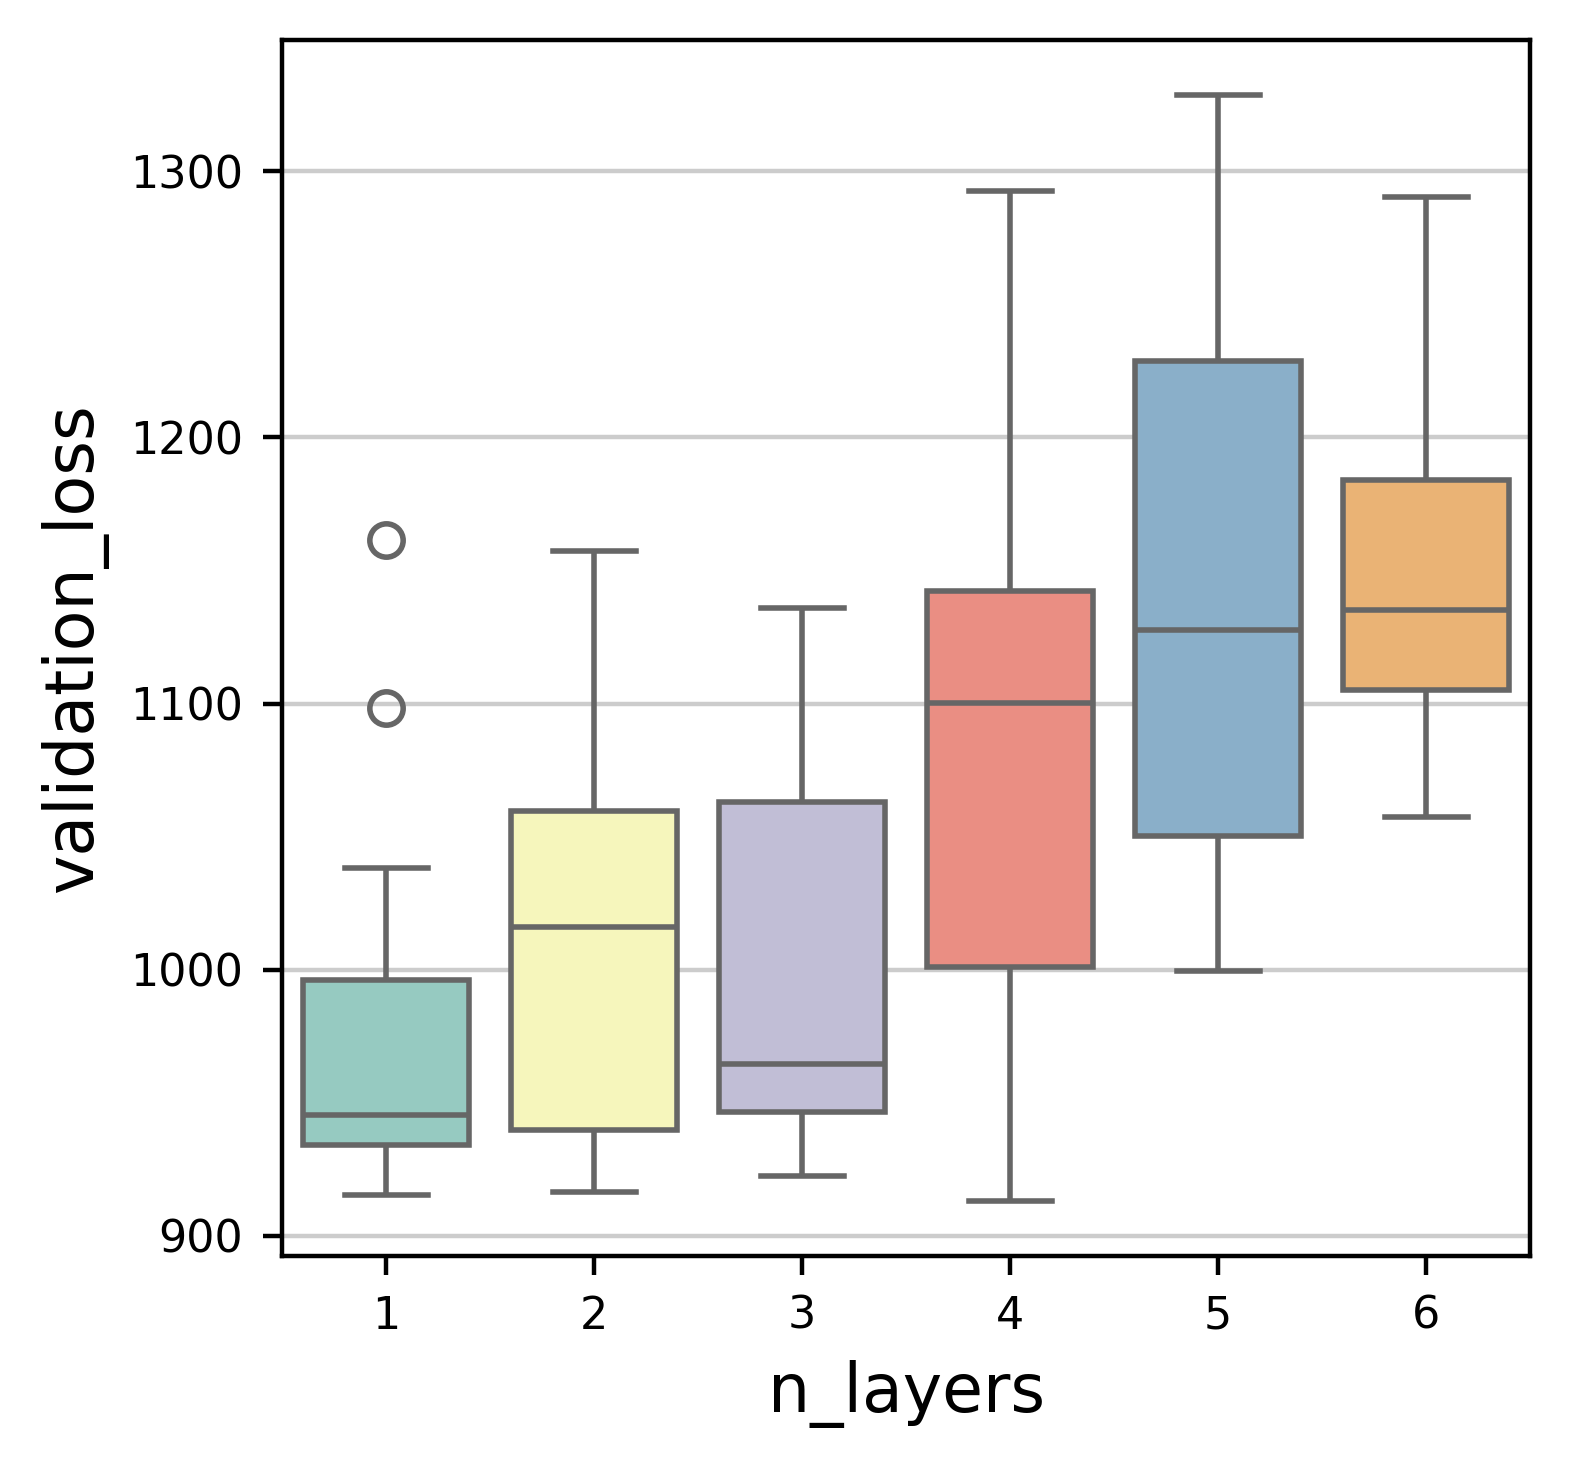

In [36]:
sb.boxplot(x="config/n_layers",y="validation_loss",data=pltDf,palette="Set3")
plt.xlabel("n_layers")
plt.savefig("../../results/preIntergration/20241018_hyperpara/tune_n_layers.pdf")

/tmp/ipykernel_578663/3184648673.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.boxplot(x="config/dispersion",y="validation_loss",data=pltDf,palette="Set3")


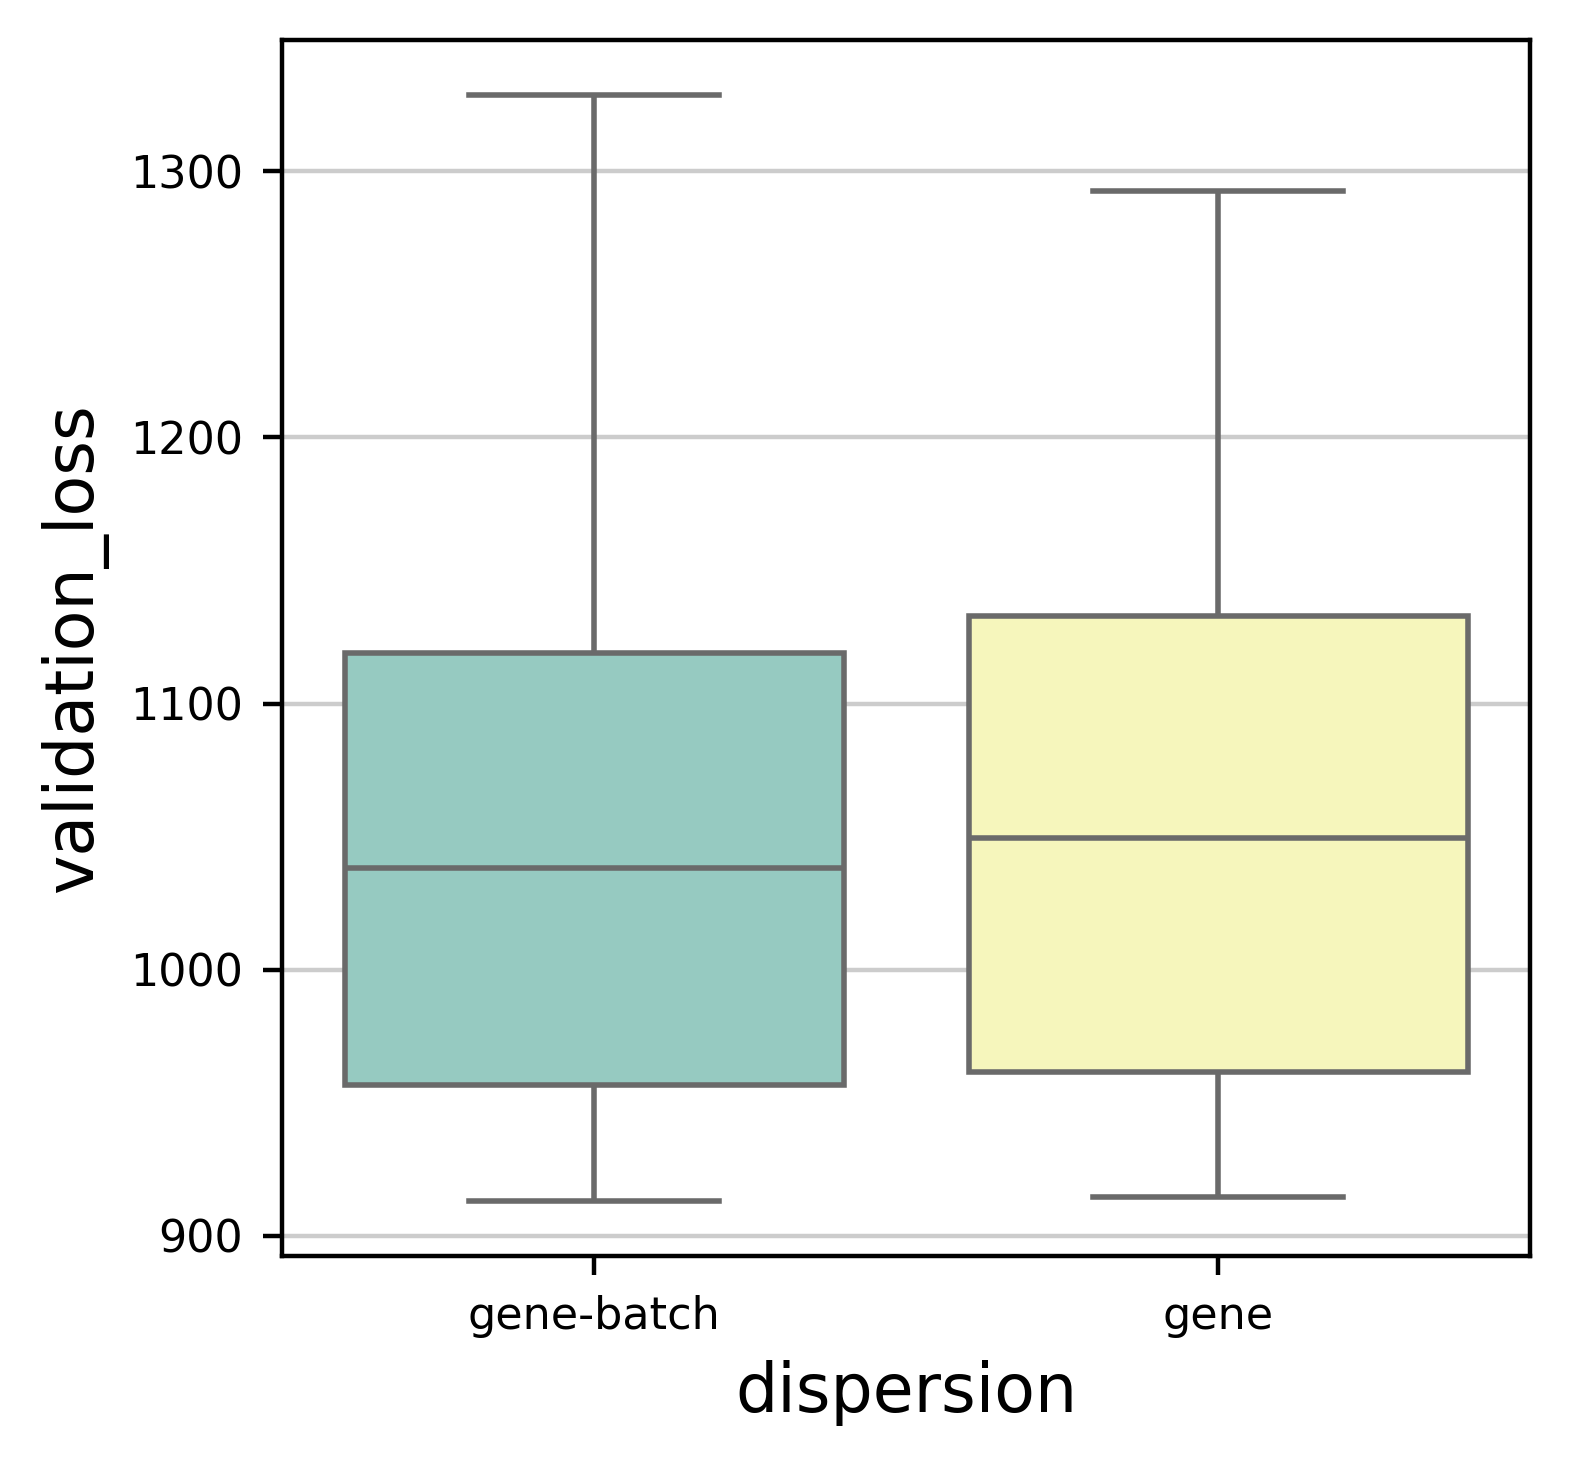

In [37]:
sb.boxplot(x="config/dispersion",y="validation_loss",data=pltDf,palette="Set3")
plt.xlabel("dispersion")
plt.savefig("../../results/preIntergration/20241018_hyperpara/tune_dispersion.pdf")

/tmp/ipykernel_578663/973697805.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.boxplot(x="iterations_since_restore",y="validation_loss",data=pltDf,palette="Set3")


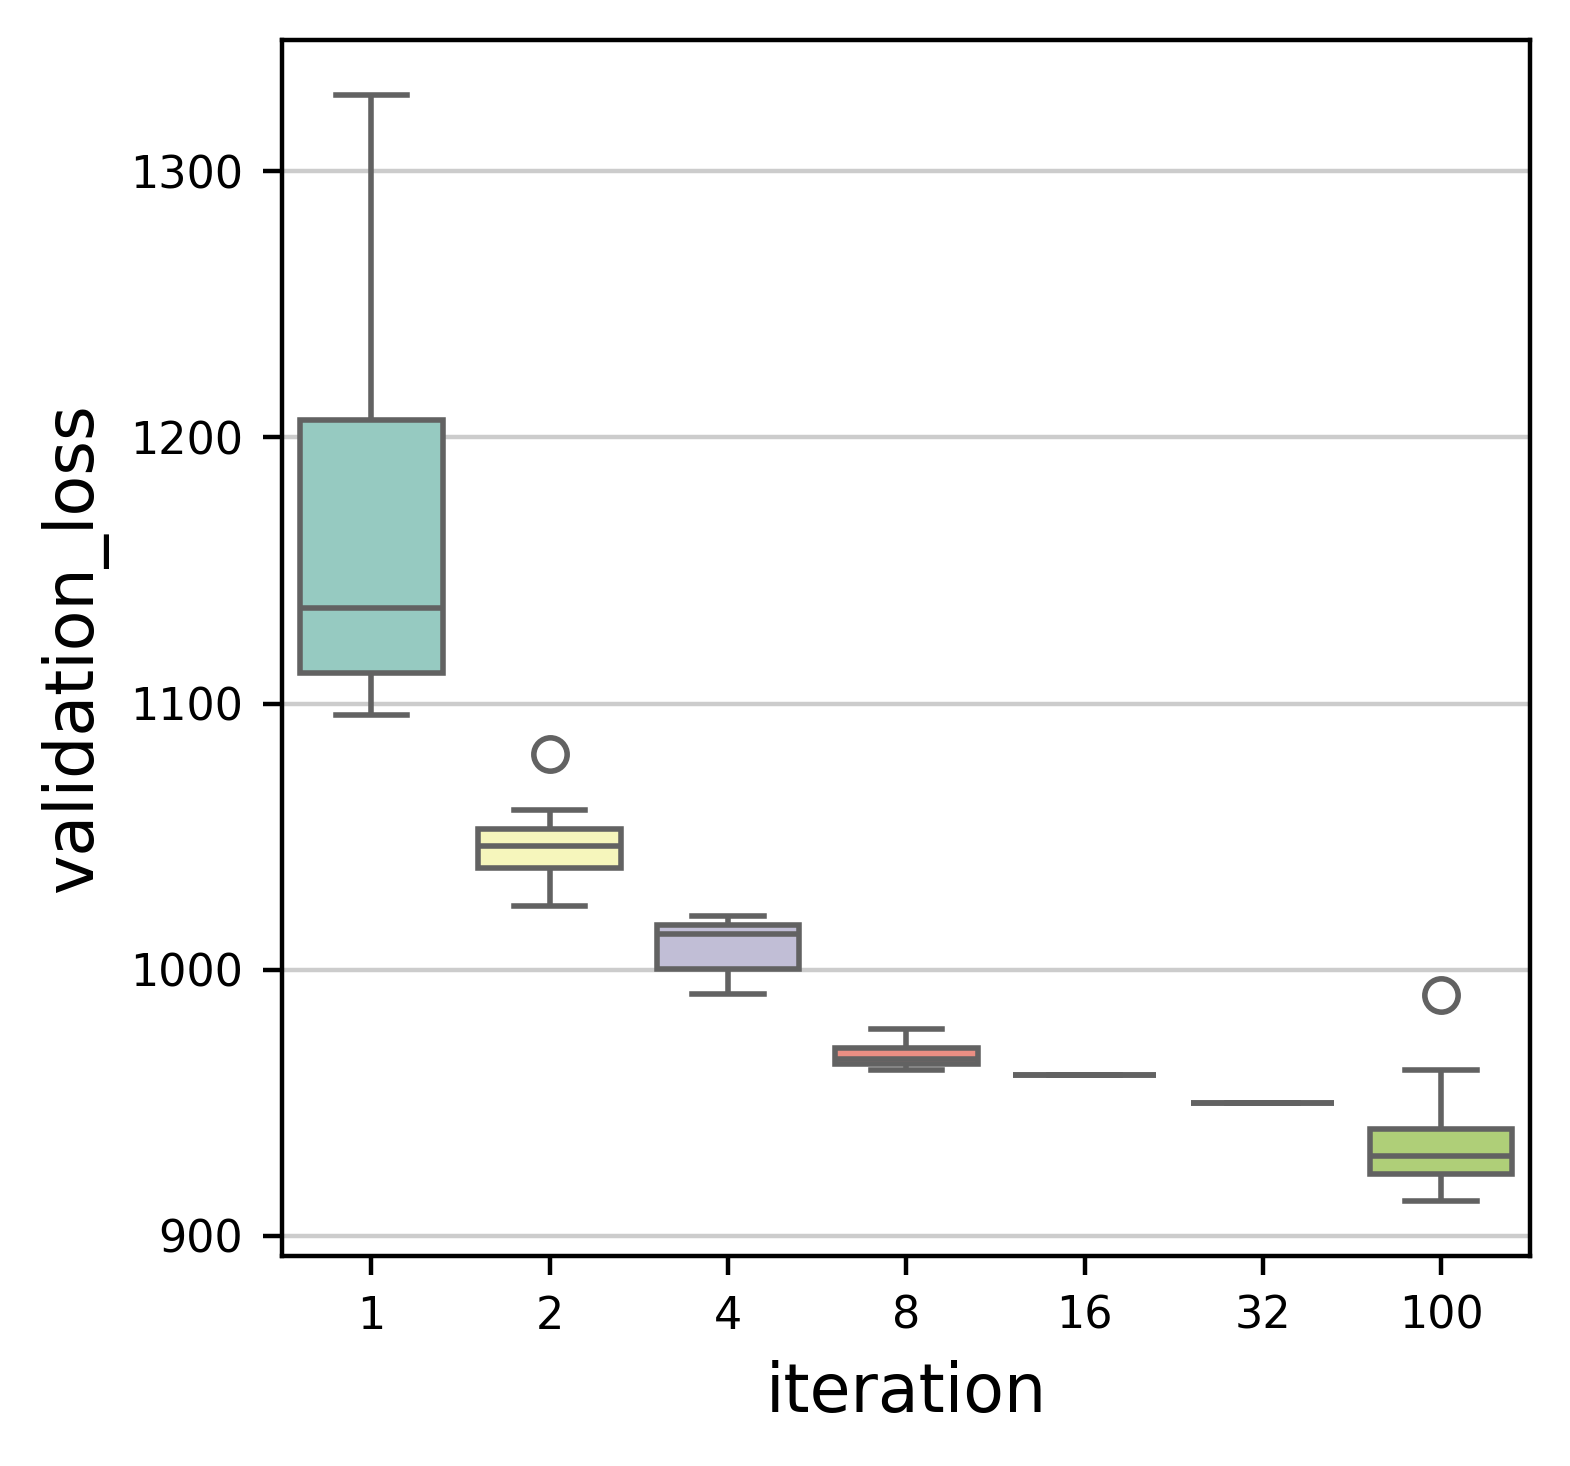

In [39]:
sb.boxplot(x="iterations_since_restore",y="validation_loss",data=pltDf,palette="Set3")
plt.xlabel("iteration")
plt.savefig("../../results/preIntergration/20241018_hyperpara/tune_iteration.pdf")

In [40]:
pltDf.to_csv("../../process/pre-intergration/hypertune//20241008_tune_loss_metric.csv")